Connected to Python 3.12.7

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
import tensorflow as tf
import keras
import warnings
warnings.filterwarnings('ignore')



In [2]:
drugDS = pd.read_csv('mental.csv')

**DATA CLEANING**

In [3]:
drugDS.head()

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


In [4]:
drugs = drugDS.dropna()
drugs.head()

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


**CORRELATION ANALYSIS AND TESTING**

*ALGORITHM TO CALCULATE AND ASSIGN CORRELATION*

In [5]:
def calculate_correlation(drugs, column1, column2, method='pearson'):
    """
    Function to calculate the correlation between two columns of a DataFrame and classify the correlation level.
    
    Parameters:
    drugs (pd.DataFrame): The pandas DataFrame containing the data.
    column1 (str): The name of the first column.
    column2 (str): The name of the second column.
    method (str): The method to calculate the correlation ('pearson', 'spearman', 'kendall'). Defaults to 'pearson'.
    
    Returns:
    tuple: The correlation coefficient and its classification.
    """
    # Ensure that the columns exist in the DataFrame
    if column1 not in drugs.columns or column2 not in drugs.columns:
        raise ValueError(f"Columns '{column1}' or '{column2}' do not exist in the DataFrame.")

    drugs[column1] = pd.to_numeric(drugs[column1], errors='coerce')
    drugs[column2] = pd.to_numeric(drugs[column2], errors='coerce')
    
    # Drop rows with NaN values in either of the columns
    drugs = drugs.dropna(subset=[column1, column2])
    
    # Calculate correlation between the two columns
    correlation = drugs[column1].corr(drugs[column2], method=method)
    
    # Classify the correlation level based on its value
    if correlation == 1:
        level = 'Perfect positive correlation'
    elif correlation >= 0.7:
        level = 'Strong positive correlation'
    elif correlation >= 0.4:
        level = 'Moderate positive correlation'
    elif correlation >= 0.01:
        level = 'Weak positive correlation'
    elif correlation == 0:
        level = 'No correlation'
    elif correlation <= -0.01 and correlation > -0.4:
        level = 'Weak negative correlation'
    elif correlation <= -0.4 and correlation > -0.7:
        level = 'Moderate negative correlation'
    elif correlation <= -0.7 and correlation > -1:
        level = 'Strong negative correlation'
    elif correlation == -1:
        level = 'Perfect negative correlation'
    else:
        level = 'Undefined correlation'
    
    output = f"The correlation between {column1} & {column2} = {correlation:.2f} ({level})"
    print(output)

    # Plot the scatter plot with a regression line
    plt.figure(figsize=(8, 6))
    sns.regplot(x=column1, y=column2, data=drugs, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
    plt.title(f"Scatter plot between {column1} and {column2}\nCorrelation = {correlation:.2f}")
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.grid(True)
    plt.show()
    
    # Return the correlation and output (if you need to use it elsewhere)
    return correlation, output

*CORRELATION BETWEEN MENTAL ILLNESSES AND DRUG USE*

The correlation between Anxiety disorders (%) & Drug use disorders (%) = 0.59 (Moderate positive correlation)


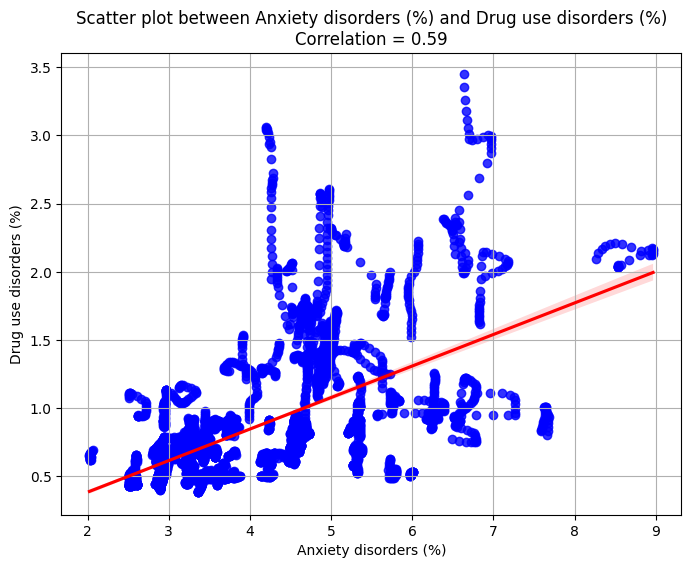

The correlation between Schizophrenia (%) & Drug use disorders (%) = 0.41 (Moderate positive correlation)


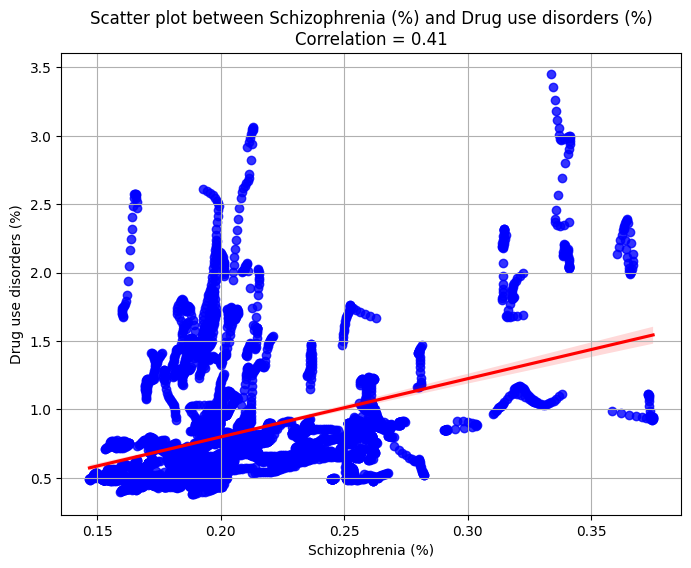

The correlation between Bipolar disorder (%) & Drug use disorders (%) = 0.35 (Weak positive correlation)


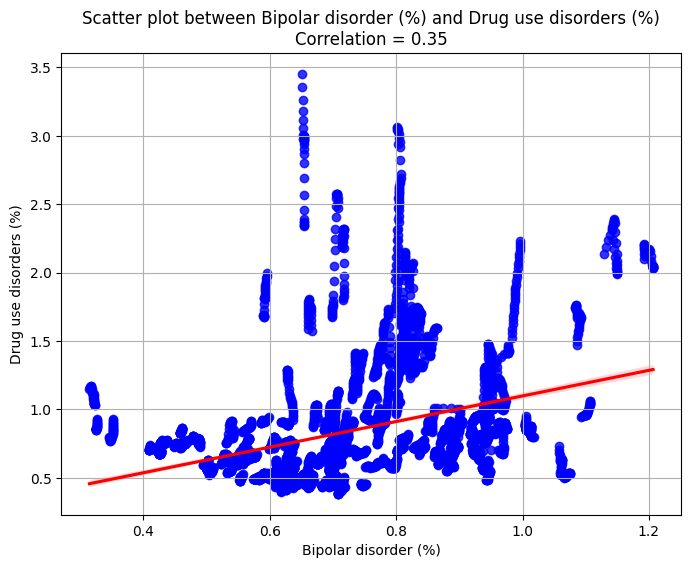

The correlation between Depression (%) & Drug use disorders (%) = 0.32 (Weak positive correlation)


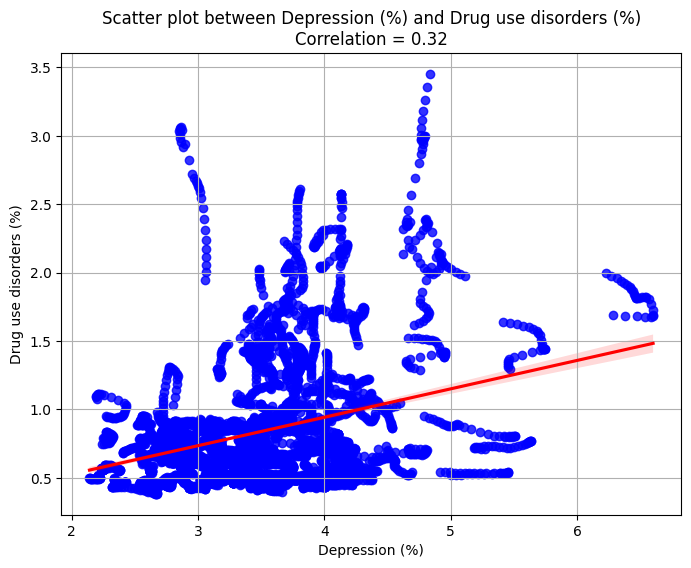

(0.5949705754608168, 'The correlation between Anxiety disorders (%) & Drug use disorders (%) = 0.59 (Moderate positive correlation)')
(0.40512605766532483, 'The correlation between Schizophrenia (%) & Drug use disorders (%) = 0.41 (Moderate positive correlation)')
(0.3482617770034696, 'The correlation between Bipolar disorder (%) & Drug use disorders (%) = 0.35 (Weak positive correlation)')
(0.31594736869818374, 'The correlation between Depression (%) & Drug use disorders (%) = 0.32 (Weak positive correlation)')


In [6]:
AD = calculate_correlation(drugs, 'Anxiety disorders (%)', 'Drug use disorders (%)', method='pearson')
SD = calculate_correlation(drugs, 'Schizophrenia (%)', 'Drug use disorders (%)', method='pearson')
BD = calculate_correlation(drugs, 'Bipolar disorder (%)', 'Drug use disorders (%)', method='pearson')
DD = calculate_correlation(drugs, 'Depression (%)', 'Drug use disorders (%)', method='pearson')

print(AD)
print(SD)
print(BD)
print(DD)

*CORRELATION BETWEEN MENTAL ILLNESSES AND ALCOHOL USE*

The correlation between Anxiety disorders (%) & Alcohol use disorders (%) = -0.15 (Weak negative correlation)


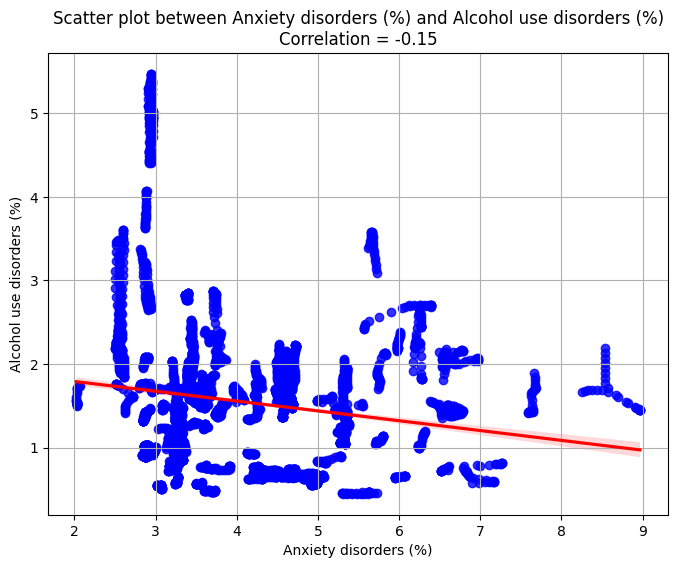

The correlation between Schizophrenia (%) & Alcohol use disorders (%) = -0.04 (Weak negative correlation)


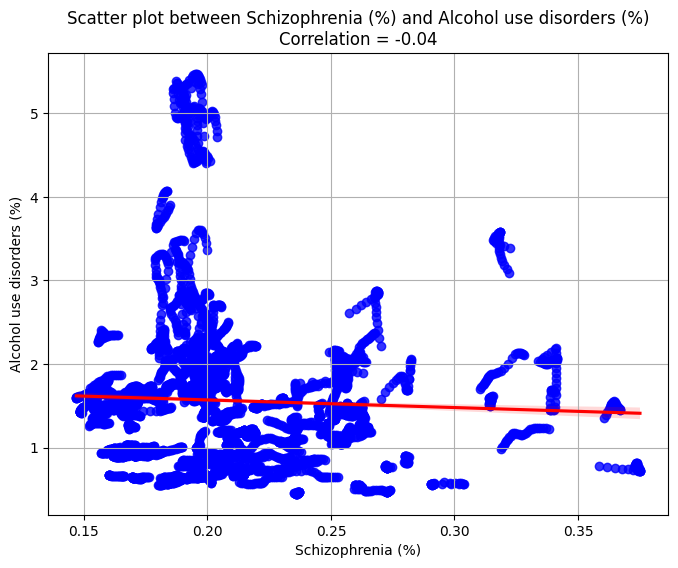

The correlation between Bipolar disorder (%) & Alcohol use disorders (%) = 0.06 (Weak positive correlation)


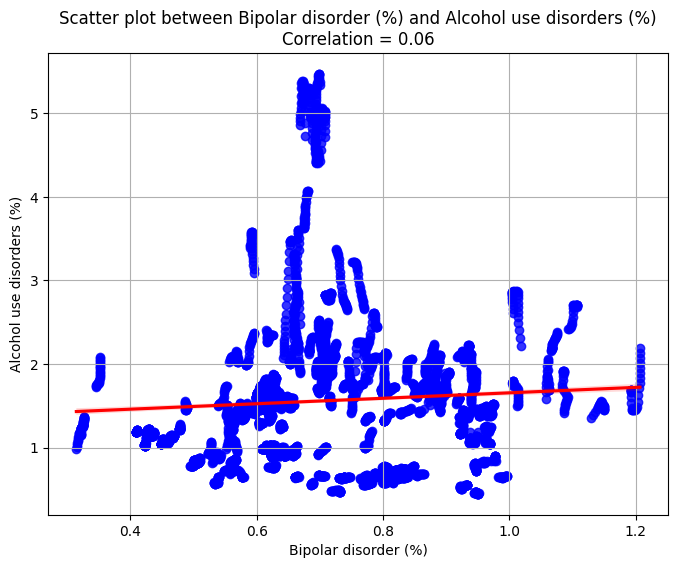

The correlation between Depression (%) & Alcohol use disorders (%) = 0.05 (Weak positive correlation)


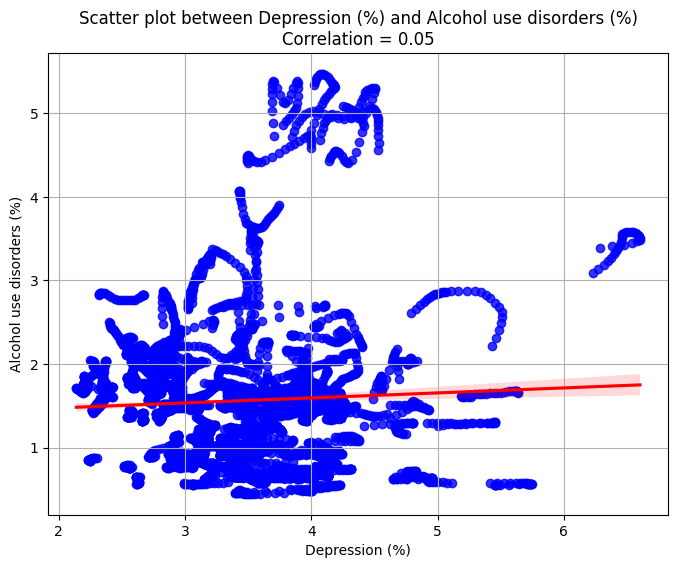

(-0.1549178653297365, 'The correlation between Anxiety disorders (%) & Alcohol use disorders (%) = -0.15 (Weak negative correlation)')
(-0.044423323750823876, 'The correlation between Schizophrenia (%) & Alcohol use disorders (%) = -0.04 (Weak negative correlation)')
(0.06219764662845644, 'The correlation between Bipolar disorder (%) & Alcohol use disorders (%) = 0.06 (Weak positive correlation)')
(0.04666887965073819, 'The correlation between Depression (%) & Alcohol use disorders (%) = 0.05 (Weak positive correlation)')


In [7]:
AA = calculate_correlation(drugs, 'Anxiety disorders (%)', 'Alcohol use disorders (%)', method='pearson')
SA = calculate_correlation(drugs, 'Schizophrenia (%)', 'Alcohol use disorders (%)', method='pearson')
BA = calculate_correlation(drugs, 'Bipolar disorder (%)', 'Alcohol use disorders (%)', method='pearson')
DA = calculate_correlation(drugs, 'Depression (%)', 'Alcohol use disorders (%)', method='pearson')

print(AA)
print(SA)
print(BA)
print(DA)

*CORRELATION BETWEEN MENTAL ILLNESSES AND EATING DISORDERS*

The correlation between Anxiety disorders (%) & Eating disorders (%) = 0.68 (Moderate positive correlation)


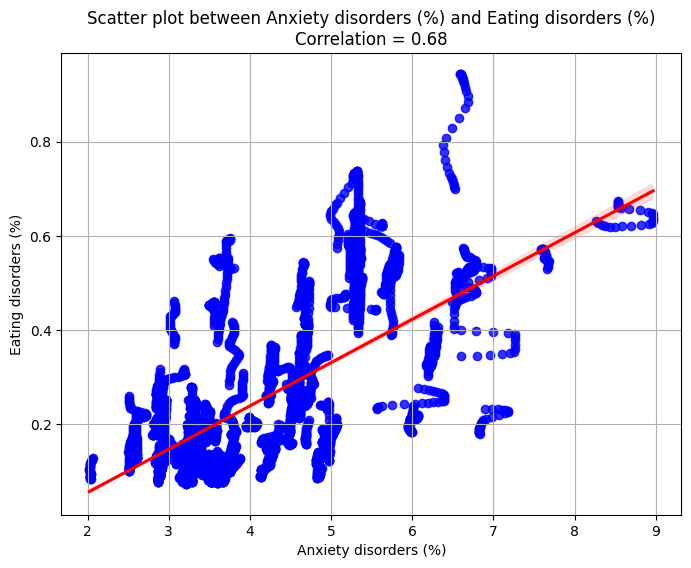

The correlation between Schizophrenia (%) & Eating disorders (%) = 0.68 (Moderate positive correlation)


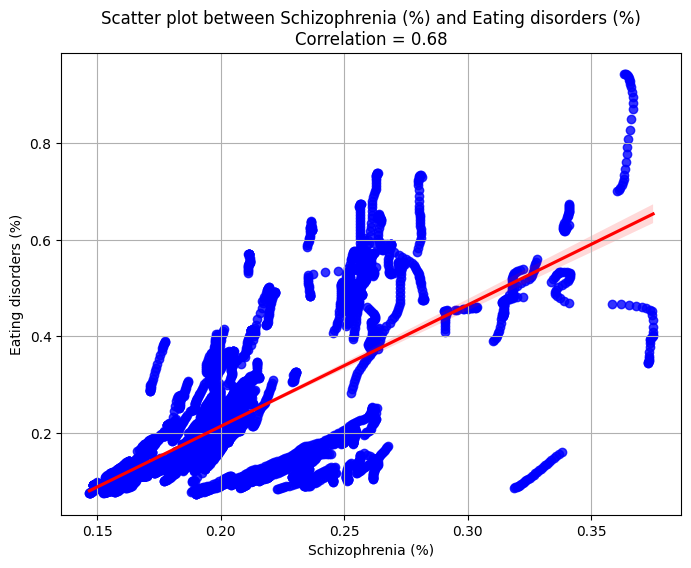

The correlation between Bipolar disorder (%) & Eating disorders (%) = 0.70 (Strong positive correlation)


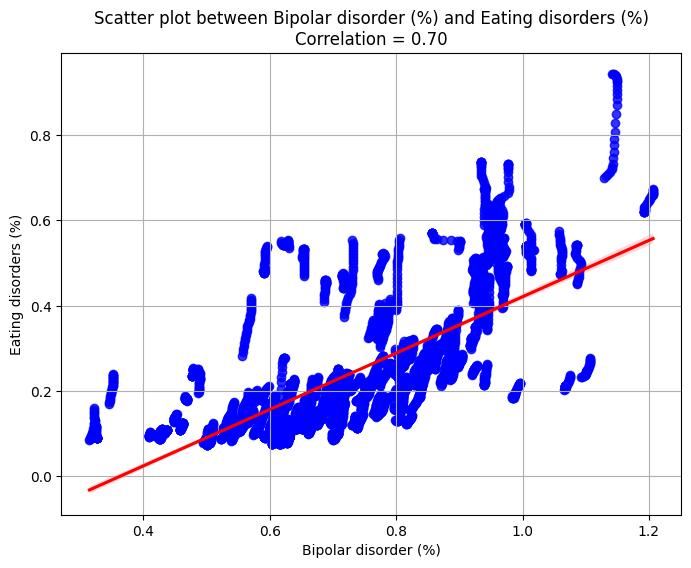

The correlation between Depression (%) & Eating disorders (%) = 0.19 (Weak positive correlation)


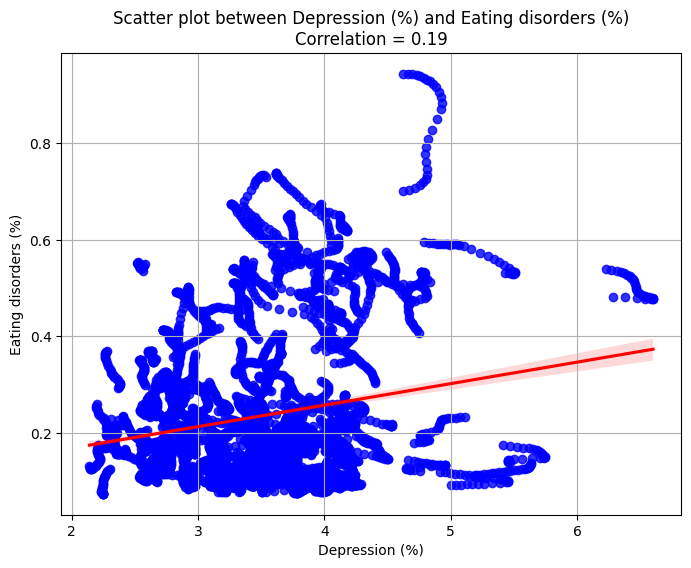

(0.6764022078908086, 'The correlation between Anxiety disorders (%) & Eating disorders (%) = 0.68 (Moderate positive correlation)')
(0.6846962190964071, 'The correlation between Schizophrenia (%) & Eating disorders (%) = 0.68 (Moderate positive correlation)')
(0.7040187339085234, 'The correlation between Bipolar disorder (%) & Eating disorders (%) = 0.70 (Strong positive correlation)')
(0.19399411103582592, 'The correlation between Depression (%) & Eating disorders (%) = 0.19 (Weak positive correlation)')


In [8]:
AE = calculate_correlation(drugs, 'Anxiety disorders (%)', 'Eating disorders (%)', method='pearson')
SE = calculate_correlation(drugs, 'Schizophrenia (%)', 'Eating disorders (%)', method='pearson')
BE = calculate_correlation(drugs, 'Bipolar disorder (%)', 'Eating disorders (%)', method='pearson')
DE = calculate_correlation(drugs, 'Depression (%)', 'Eating disorders (%)', method='pearson')

print(AE)
print(SE)
print(BE)
print(DE)

**INFERENCE**

*DRUG USE AND MENTAL ILLNESSES*
1. There is a moderate positive correlation between Anxiety disorders and Drug use disorders (r = 0.59), indicating that as the prevalence of anxiety disorders increases, so does the prevalence of drug use disorders.
2. A similar trend is observed with Schizophrenia (r = 0.41), suggesting a moderate positive relationship as well. This indicates that individuals with schizophrenia may also experience higher rates of drug use disorders.
3. Bipolar disorder (r = 0.35) and Depression (r = 0.32) show weak positive correlations with drug use disorders, indicating that while there is some association, it is less pronounced compared to anxiety and schizophrenia.

*ALCOHOL USE AND MENTAL ILLNESSES*
1. In contrast, the correlations between mental health disorders and Alcohol use disorders are generally weak and negative. For example, Anxiety disorders show a weak negative correlation (r = -0.15), suggesting that higher anxiety levels may be associated with lower alcohol use, albeit not strongly.
2. Similarly, the relationships with Schizophrenia (r = -0.04) and Depression (r = 0.05) indicate minimal to no association with alcohol use, with Bipolar disorder also showing a weak positive correlation (r = 0.06).

*EATING DISORDERS AND MENTAL ILLNESSES*
1. The analysis indicates strongr associations between mental health disorders and Eating disorders. Notably, there is a strong positive correlation between Bipolar disorder and Eating disorders (r = 0.70), suggesting that individuals with bipolar disorder may experience higher rates of eating disorders.
2. Both Anxiety disorders and Schizophrenia exhibit moderate positive correlations with eating disorders (r = 0.68), reinforcing the notion that individuals suffering from these mental health conditions may also struggle with eating disorders.
3. Conversely, Depression shows a weak positive correlation (r = 0.19) with eating disorders, indicating a lesser degree of association.

***CONCLUSION***

Overall, the findings suggest that anxiety and schizophrenia are significantly linked to higher rates of drug and eating disorders, while bipolar disorder shows particularly strong correlations with eating disorders. In contrast, the associations with alcohol use disorders are weak, indicating a more complex relationship that may warrant further investigation. These insights can inform interventions and treatment strategies that address the interconnected nature of these disorders.